<a href="https://colab.research.google.com/github/anavel898/AML-iris-project/blob/main/iris_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied machine learning - basic project: Iris data set  
The Iris data set is a multivariate data set containing data about 3 Iris species: Iris setosa, Iris versicolor and Iris virginica. Species represent classes in my ML framework. Each example has 4 numeric attributes - sepal length, sepal width, petal length and petal width.  
The goal of my project is to find a machine learning model able to classify new examples of Irises desribed by these 4 attributes into one of the 3 species (classes). 


# 1. Loading the data set

I'm loading my data set as a pandas data frame.  
My data set is availble on my github and I will loade it from there. I use the read_csv() function which is part of the pandas library. 

In [ ]:
import pandas as pd

In [ ]:
url='https://raw.githubusercontent.com/anavel898/AML-iris-project/main/iris.csv'
names=['sepal-len','sepal-wid','petal-len','petal-wid','class']
dataSet=pd.read_csv(url, names=names)  #assigning names to columns of the data frame


In [ ]:
dataSet

,sepal-len,sepal-wid,petal-len,petal-wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Data exploration  
Data can be explored with descriptive statistic methods. Also, data visualization is also useful, so a clearer insight into things that might be miss from the numerical results is gotten.  
For numerical explorations I will use functions available in the pandas liibrary, and I will visualize my data using matplolib functions combined with ones from pandas and numpy.   
This step in the pipeline is necessary to determine which further steps (if any) are needed to preprocess the data, so it's best suited as input for the ML models which will be used. 

**Numerical explorations:**





*   Using the shape atribute of the data frame containing the data set to see how many examples it contains.  
*   Checking if classes are uniformly distributed in the data set. This is done by using the groupby() method on the dataset which returns a grouby object, and I print out its size.
*   Exploring basic statistical data using the describe() function. 
*   Determining the presence of correlation among attributes. This can be done using the corr() function on the data frame. I will specify the method parameter to 'pearson' so the correlations I get as output will be Pearson correlations.




In [ ]:
#checking the shape
print("Shape of the data frame:", dataSet.shape)

#checking class distribution
countClasses=dataSet.groupby('class')
print("\nClass distribution:\n\n",countClasses.size())

#getting descriptive statistics
description = dataSet.describe()
print("\nDescriptive statistics:\n\n",description)

#checking for correlation
correlation=dataSet.corr(method='pearson')
print("\nPearson correlation results:\n\n",correlation)

Shape of the data frame: (150, 5)

Class distribution:

 class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Descriptive statistics:

         sepal-len   sepal-wid   petal-len   petal-wid
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

Pearson correlation results:

            sepal-len  sepal-wid  petal-len  petal-wid
sepal-len   1.000000  -0.117570   0.871754   0.817941
sepal-wid  -0.117570   1.000000  -0.428440  -0.366126
petal-len   0.871754  -0.428440   1.000000   0.962865
petal-wid   0.817941  -0.366126   0.962865   1.000000


I determine that each class is represented by the same number of examples in my data set.  
There is no missing values in this data set. Also, I notice that my features are in different ranges, so learning algorithms could perheps benefit from rescaling the features. This will be attempted in the next step of the pipeline.  
Furthermore, some attributes seem to be very highly correlated with eachother. I will decide later, after I apply the methods to do feature selection whether I will retain them or not. Of the top of my head, I would say that it's not a smart choice to discard them since the data set has a small number of features as it is, and each attribute has a strong biological importance for determining the species of flower.


**Visualizing my data:**

*   Univariate plots: I will create density and box plots for each of the attributes in the data set. The density plot will show the overall trends in each feature, and box plots will give light to outliers if they are present.
*   Multivariate plots: These plots will show how the features in the data set interract with eacother. I will create a heat map and a scatter plot. 




In [ ]:
from matplotlib import pyplot
import numpy as np

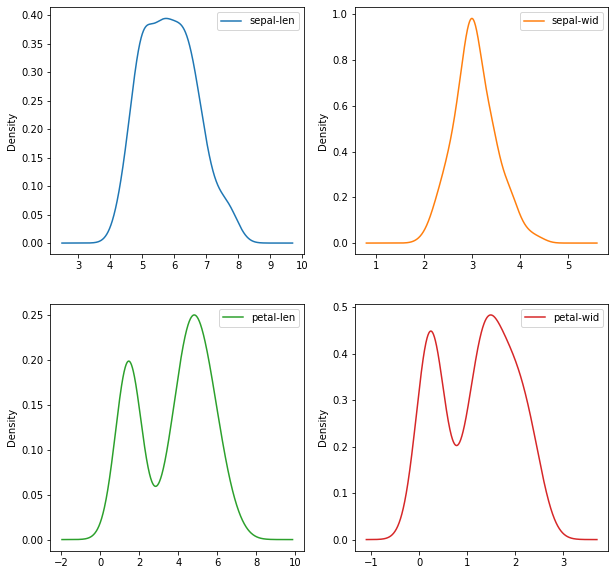

In [ ]:
#Creating density plots
pyplot.rcParams["figure.figsize"] = [10,10]  #I customize the size of figures in pyplot by changing the rcParams object
dataSet.plot(kind='density', subplots=True, layout=(2,2), sharex=False)  #plot() is a pandas function that makes plots out of a data frame 
pyplot.show()

Sepal length and width roughly follow the Gaussian distribution, although the sepal width distribution is pretty narrow. Trends in both dimensions of petals indicate there might be two groups in the data. 

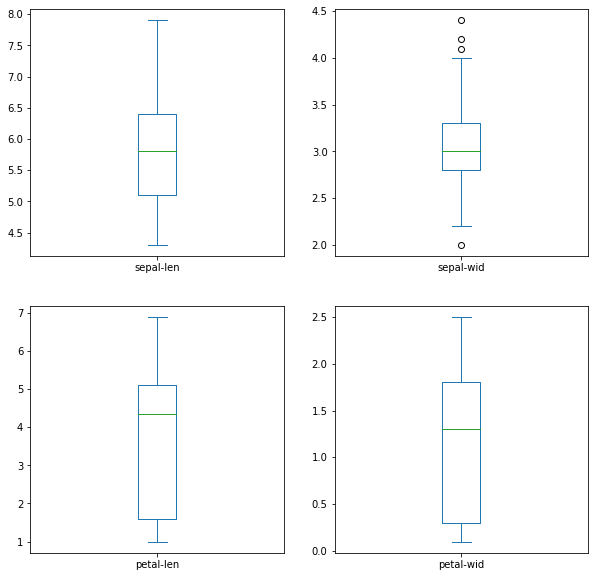

In [ ]:
#Creating box plots
dataSet.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

Thre are outliers only in the sepal width feature.

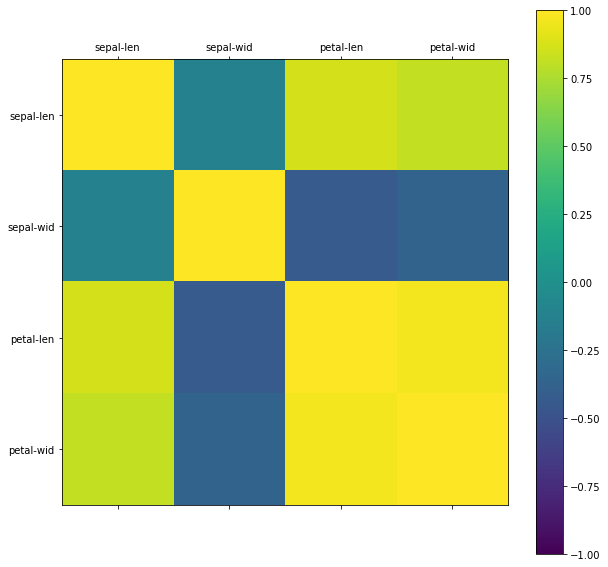

In [ ]:
#Creating a heat map
figure=pyplot.figure()                          #creating a new figure
axes=figure.add_subplot(111)                    #adding an axes to the figure with default parameters
cax=axes.matshow(correlation, vmin=-1, vmax=1)  #displays the correlation matrix created in previous steps; vmin and vmax determine the range of values

#formatting the plot
figure.colorbar(cax)
ticks=np.arange(0,4,1)
axes.set_xticks(ticks)
axes.set_yticks(ticks)
axes.set_xticklabels(names)
axes.set_yticklabels(names)
pyplot.show()

This heat map makes the correlation I noticed in the numerical analysis of the data very obvious. 

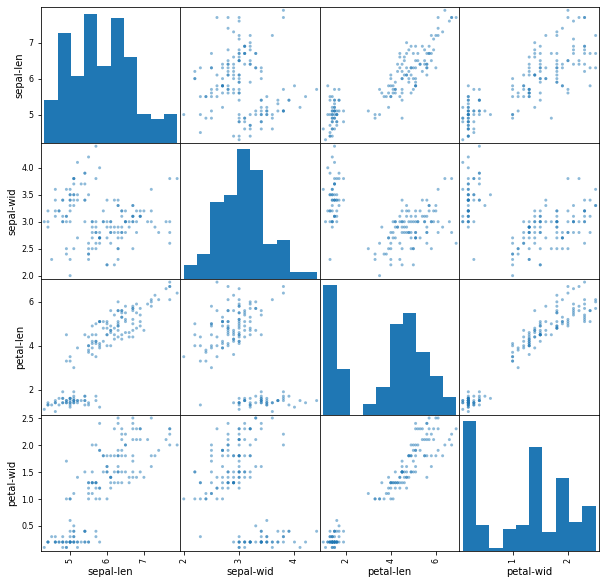

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataSet)   #creates a matrix of scatter plots for variables from the data frame given as input
pyplot.show()

Again, the positive correlation between petal width and length is noticable. Also, petal width and sepal length show a correlation, but a part of the data of these two features seems independent.

# 3. Data preparation  
Data prep can be done using the scikit-learn library. The purpose of data prep is to process your data in such a way that the information it carries becomes more easily recognazible to the machine learning algorithm. Generally, four main steps can be done during data prep:
*   Rescaling the data: goal is to get the same scale for all possible features
*   Standardizing the data: done to transform all features a Gausian distribution with mean=0 and SD=1.
*   Normalizing the data: idea is to go to a unit norm, i.e., to a vector of lenght 1.
*   Binarizing the data: binary data which was not binary before according to some threshold. Above threshold assign 1, below theshold assign 0.   

However, not all four steps are included in the pipeline of training a ML model for each data set. 


Before doing any transformations I need to separate my data set in two vectors - the feature vector X and classes vector Y.

In [ ]:
onlyValues=dataSet.values #this will create a variable containing only the values of the data frame
X=onlyValues[:,0:4]
Y=onlyValues[:,4]

In [ ]:
print("Feature vector:\n",X[0:10,:])
print("\n---------------------\n")
print("Classes vector:\n",Y[0:10])

Feature vector:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

---------------------

Classes vector:
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [ ]:
#Importing functions needed for data prep from scikit-learn.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

In [ ]:
#Rescaling data so they all have values in range [0,1]
scaler=MinMaxScaler(feature_range=(0, 1))
prepedX=scaler.fit_transform(X)

#Standardizing data 
#stand=StandardScaler(with_std=False)
#standardizedX=stand.fit_transform(X)

#Normalize data
#norm=Normalizer()
#prepedX=norm.fit_transform(standardizedX)

#Binarization
#binarizer=Binarizer(threshold=0.0)
#prepedX=binarizer.fit_transform()

print(prepedX[0:15,:])

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]]


I chose just to rescale the data because this transforms my data into suitable input for the algorithms I will apply later.  
I omitted binarization since the concept of my data is very simple, and doesn't really need binarization (like images as data for example). I have empirically proven standardization and normalization to be a bad approach to processing my data, since when training models with data processed in this way I got poor results. 

Now I will repeat some of the plots I previously made to see how my data is behaving now. 

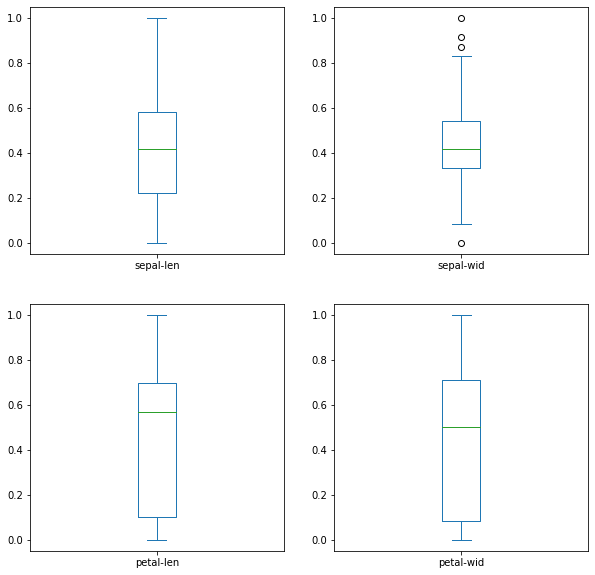

In [ ]:
prepedDatafr=pd.DataFrame(prepedX, columns=names[:-1])  #convertin the numpy array back into a pandas data frame for plotting
#Creating box plots
prepedDatafr.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

Outliers have remained, and the distributions stayed the same. This is expected because rescaling doesn't change the distribution of the data. 

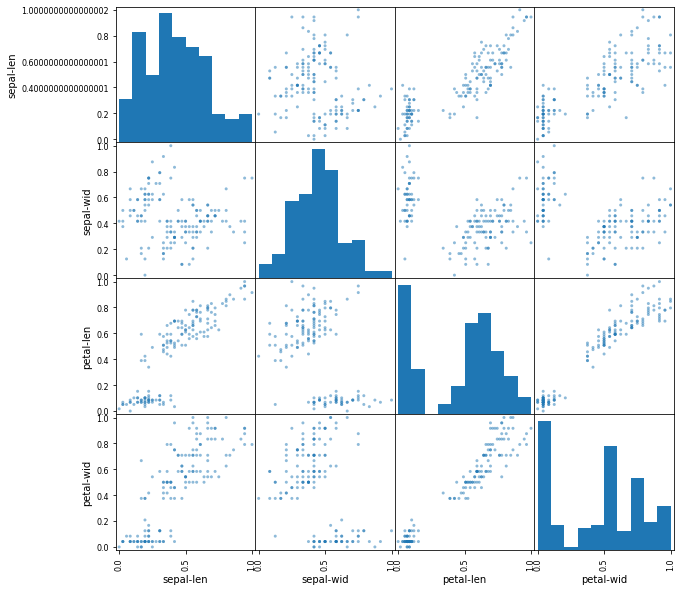

In [ ]:
#Creating scatter plots
scatter_matrix(prepedDatafr)
pyplot.show()

Correlation patterns between attributes representing petal dimensions persist.

# 4. Feature selection  
This step results in a selection of features which will be given to the learning algorithm. Feature selection is done to avoid overfitting, to improve accuracy and to reduce training time. It's based on performing different operations on your features that will point out the most important ones. Combining this knowledge with the things discovered durng data exploration will point out which features to select.  
Feature selection is a very important step of a machine learning pipeline. I will use some methods of assesing which features are most important, and rank them according to that. Later I will try to train the models with different combination of features and see what gives the best performance.  
Techiniques I will apply:  
*   Univariate selection - based on statistical tests
*   Recursive feature elimination - this techique is model specific. 



In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#Univariate selection: apply chi2 test to select the best k=2
test=SelectKBest(chi2, k=2)  
fit = test.fit(X, Y)
set_printoptions(precision=3)
print(fit.scores_)
print(names[:-1])

[ 10.818   3.711 116.313  67.048]
['sepal-len', 'sepal-wid', 'petal-len', 'petal-wid']


According to the chi2 test, the most important features (statistically) are petal dimensions. Sepal dimensions seem much less important.

In [ ]:
#Importing all the models I will use and the RFE class
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid #RFE can't be used for it because it makes use of all features

In [ ]:
#Creating a list of tuples of models and their names
models=[]
models.append(('Logistic regression', LogisticRegression(solver='lbfgs', max_iter=5000, multi_class='multinomial')))
models.append(('Decision tree', DecisionTreeClassifier()))
models.append(('Ridge', RidgeClassifier(max_iter=5000)))
models.append(('Random forest', RandomForestClassifier()))
models.append(('Linear SVC', LinearSVC(multi_class='ovr')))


In [ ]:
#Doing Recursive feature elimination for each of the models
for name, model in models:
  recFeatElim=RFE(model)
  fit=recFeatElim.fit(prepedDatafr,Y) #since I'm actually fitting the model here, I will use the preprocessed features
  print(name)
  print("Number of features: %d" % fit.n_features_)
  print("Selected features: %s" % fit.support_)
  print("Ranks: %s" % fit.ranking_)
  print("\n")
print(names[:-1])

Logistic regression
Number of features: 2
Selected features: [False False  True  True]
Ranks: [3 2 1 1]


Decision tree
Number of features: 2
Selected features: [False False  True  True]
Ranks: [2 3 1 1]


Ridge
Number of features: 2
Selected features: [False  True False  True]
Ranks: [3 1 2 1]


Random forest
Number of features: 2
Selected features: [False False  True  True]
Ranks: [2 3 1 1]


Linear SVC
Number of features: 2
Selected features: [False False  True  True]
Ranks: [3 2 1 1]


['sepal-len', 'sepal-wid', 'petal-len', 'petal-wid']


In most of the models, again petal dimensions are confirmed to be the most important features.  
So, in further steps I will take two approaches in training my models - using all 4 features and only using petal dimensions. I will see which approach gives better performance. 

# 5. Estimating and comparing performance of ML algorithms on iris data set  
Model performance will be estimated in two ways. First all models will be evaluated by resampling using the k-fold cross-validation, and accuracy will be calculated as a performance metric. Then a confusion matrix for each model will be generated based on spliting the data set into a training and testing part. Based on the results of these two procedures, the best performing model will be selected and in the next step parameter tuning will be performed on it. 

In [ ]:
#Importing classes required for evaluating models
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report 

In [ ]:
models=[]
models.append(('Logistic regression', LogisticRegression(solver='lbfgs', max_iter=5000, multi_class='multinomial')))
models.append(('Decision tree', DecisionTreeClassifier()))
models.append(('Ridge', RidgeClassifier(max_iter=5000)))
models.append(('Random forest', RandomForestClassifier()))
models.append(('Linear SVC', LinearSVC(multi_class='ovr', max_iter=7000)))
models.append(('Nearest centroid', NearestCentroid()))

In [ ]:
#creating a data frame with just petal dimensions features
selFeat = prepedDatafr.iloc[:,2:]
selFeat

,petal-len,petal-wid
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [ ]:
#creating a data frame with raw values of petal dimensions features
rawSelFeat = dataSet.iloc[:,2:4]
rawSelFeat

,petal-len,petal-wid
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
#Testing the model on preprocessed petal dimensions features
prepedPetalFeatures = []  #using this list to summarize the performance of each training method at the end
for name, model in models:
  #print(name+":")
  result=cross_val_score(model, selFeat, Y, cv=5, scoring='accuracy')
  prepedPetalFeatures.append(result.mean())
  #print("Accuracy: %.4f (%.4f)\n" % (result.mean(), result.std()))

In [ ]:
#Testing the models on preprocessed features (all 4)
prepedAllFeatures = []
for name, model in models:
  #print(name+":")
  result=cross_val_score(model, prepedDatafr, Y, cv=5, scoring='accuracy')
  prepedAllFeatures.append(result.mean())
  #print("Accuracy: %.4f (%.3f)\n" % (result.mean(), result.std()))

In [ ]:
#Testing on raw values for all 4 features
rawAllResults = []
for name, model in models:
  #print(name+":")
  result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
  rawAllResults.append(result.mean())
  #print("Accuracy: %.4f (%.3f)" % (result.mean(), result.std()))

In [ ]:
#Testing on raw values for petal dimension features
rawPetalsResults = []
for name, model in models:
  #print(name+":")
  result=cross_val_score(model, rawSelFeat, Y, cv=10, scoring='accuracy')
  rawPetalsResults.append(result.mean())
  #print("Accuracy: %.4f (%.3f)" % (result.mean(), result.std()))

In [ ]:
#Visualizing accuracy of all models from all tuns together
model_names = []
for name, model in models:
  model_names.append(name)
summarized = pd.DataFrame(data = [rawAllResults, rawPetalsResults, prepedAllFeatures, prepedPetalFeatures], columns = model_names, index = ['raw-all-features', 'raw-petal-features', 'processed-all-features', 'processed-petal-features'])
summarized

,Logistic regression,Decision tree,Ridge,Random forest,Linear SVC,Nearest centroid
raw-all-features,0.973333,0.960000,0.840000,0.960000,0.966667,0.933333
raw-petal-features,0.960000,0.946667,0.760000,0.960000,0.940000,0.966667
processed-all-features,0.926667,0.953333,0.846667,0.966667,0.913333,0.933333
processed-petal-features,0.960000,0.953333,0.740000,0.960000,0.940000,0.960000


In [ ]:
print(summarized.max(axis=1)) #getting max values of each input
print(summarized.max(axis=0)) #getting max values of each model

raw-all-features            0.973333
raw-petal-features          0.966667
processed-all-features      0.966667
processed-petal-features    0.960000
dtype: float64
Logistic regression    0.973333
Decision tree          0.960000
Ridge                  0.846667
Random forest          0.966667
Linear SVC             0.966667
Nearest centroid       0.966667
dtype: float64


The raw, complete data set gives the best accuracy. This indicates that the iris data set contains very good data, which needs no preprocessing to give good predictions.   
The best performing model on this data set is Logistic regression. This is the algorithm which will be further tuned in next steps.

Now confusion matrices will be generated for all algorithms which were used. This is done by splitting the data set into a part which will be used to train the models, and a part which will be used to test and produce the confusion matrix. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
#Getting cross validation confusion matrix for all used algorithms on the raw data set containing all 4 features
testSize=0.2  #proportion of the data set to be included in the test split
seed=5        #impacts the shuffling of data done before performing the split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=testSize, random_state=seed)
for name, model in models:
  model.fit(X_train, Y_train)
  predicted = model.predict(X_test)
  matrix=confusion_matrix(Y_test, predicted)
  print(name+":")
  print(matrix)

Logistic regression:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
Decision tree:
[[ 8  0  0]
 [ 0  9  2]
 [ 0  0 11]]
Ridge:
[[8 0 0]
 [0 7 4]
 [0 4 7]]
Random forest:
[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]
Linear SVC:
[[ 8  0  0]
 [ 0  8  3]
 [ 0  1 10]]
Nearest centroid:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]


The values on the diagonal of the confsion matrix represent correctly predicted examples. In this validation method the best performing model is Nearest centroid, since its diagonal has the most values. Logistic regression is very close to it in performance.  
The reason why the result here is different compared to the calculated accuracy is probably due to the fact that when accuracy was being calculated technique of k-fold cross validation was employed (meaning k folds are created, k-1 are used for training and 1 fold for testing), while in this instance the data set was simpy split into training and testing part and the confusion matrix is obtained from these calculations.


# 6. Algorithm tuning  
Algorithm tuning is applied to get better performance out of a model. It is done by optimizing the hyperparameters of the model, so it is better at predicting outcomes.  
Since Logistic regresion is the best performing model, I will attempt parameter tuning on it. I will try to improve the accuracy of this algorithm on the iris data set, by tuning the C hyperparameter, which controls penalty strength. Smaller values of C instruct the model to give more wieght to the training data, and higher C instruct it to put more weight on complexity even at the cost of fitting thedata. Also, I will try to see which solver performs the best.  
I will use grid search parameter tuning.


In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
#cVals=np.array([1000, 100, 10, 0.1, 0.01, 0.001]) 
#the result was that the best hypeparameter is 10, so now we try with values close to 10 to see if it can do better with best score of 0.98125
#cVals=np.array([11, 10, 8])
cVals=np.array([11.5, 11, 10.5, 10])
solverOptions=['lbfgs', 'sag', 'saga', 'newton-cg']  #I omit the liblinear solver, due to incompatibility with multinomial
paramGrid=dict(C=cVals, solver=solverOptions) #converting hyperparameter values into a dictionary, since GridSearchCV class needs them in that form to use as a parameter
grid=GridSearchCV(estimator=LogisticRegression(multi_class='multinomial', max_iter=5000), param_grid=paramGrid, scoring='accuracy',
                  cv=40) #cv parameter determines the number of folds to be performed in StratifiedKFold
grid.fit(X, Y)
print(grid.best_score_)
#print(grid.best_estimator_.C)
print(grid.best_params_)

0.98125
{'C': 10.5, 'solver': 'sag'}


The best score remains 0.98125 for C = 10.5, so it can be concluded that the 
Logisitc regression model performs best on the iris dataset with the C hyperparameter with value 10.5 and using the sag solver.  
Let's check how setting these two parameters will impact the accuracy of the model.

In [ ]:
result=cross_val_score(LogisticRegression(solver='sag', max_iter=5000, multi_class='multinomial', C=10.5), X, Y, cv=5, scoring='accuracy')
print("Accuracy after parameter tuning: %.4f (%.3f)" % (result.mean(), result.std()))

Accuracy after parameter tuning: 0.9800 (0.027)


The accuracy before parameter tuning was 0.9733, so parameter tuning has improved the accuracy.

# 7. Final remarks  
The best performing model on the iris data set out of the six models I tried to train is Logistic regression. With some parameter tuning, it reached the accuracy of 98%, which is very good.  
The algorithm performed best using all four features in the data set without any preprocessing applied. In the pipeline I performed preprocessing steps, as well as feature selection because those steps are generally very importan when doing machine learning. As an ML practitioner you usually have no control of the data you get to work with, so data can be of varying quality. In instances when the data set you are working with is of poor quality or has a thousands of features, some of which may be on widely different scales and in different interactions, it's crucial to preprocess the data and select proper features to improve and even make possible a machine learning algorithm to work on them. The iris data set clearly contains data of good quality, and a small number of features which are all on the same scale, so there isn't such a strong need to perform preprocessing since the final result is better when doing everything with raw data. However, data preprocessing didn't significantly decrease the performance of some of these algorithms. This may imply that if some other models were used, the preprocessed and feature-selected training data would outperform the raw data. Nonetheless, the fact that certain learning algorithms perform well on the raw iris data set remains.